# The Spark Foundation Internship

### By : Piyush Jain

## Task 1 - Prediction Using supervised ML

Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

In [1]:
import numpy as np  # for matricx operations
import pandas as pd   # for data processing , Read CSV
import seaborn as sns   # for visualization
import matplotlib.pyplot as plt

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

data.shape

(25, 2)

In [3]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


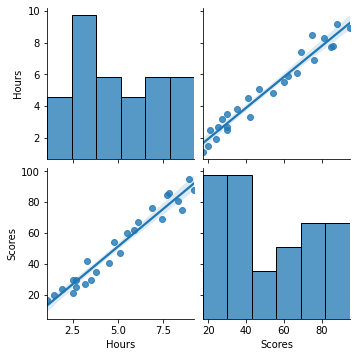

In [5]:
sns.pairplot(data , kind='reg' , palette='rainbow')

From the above figure we can observe a strong positive correlation 

## Prepare the data

### 1. Dividing the data into features and labels

In [6]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

### 2. Splitting the data into Train and Test

In [7]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0) 

In [8]:
print('Training data {} , Testing data {} '.format(X_train.shape,X_test.shape))

Training data (20, 1) , Testing data (5, 1) 


## Training Model

In [9]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()

lin.fit(X_train,y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
lin_pred = lin.predict(X_test)


In [11]:
#Comparing Actual VS Linear Regression predicted values

df = pd.DataFrame({'Actual': y_test, 'Predicted': lin_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Predicting Score when study duration is 9.5 hrs ###

In [18]:
new_pred = lin.predict([[9.5]])
print(new_pred)

[96.16939661]


## Evaluating the Model

In [13]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, lin_pred)) 
print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test, lin_pred)) 
print('Root Mean Squared Error Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, lin_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error Error: 4.6474476121003665
